In [3]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
from matplotlib import pyplot

In [4]:
# generate 2d classification dataset
X, Y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [5]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainY, testY = Y[:n_train], Y[n_train:]

In [6]:
# define model
model = Sequential()
model.add(GaussianNoise(0.01, input_shape=(2,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

W1226 04:50:40.606081  8148 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1226 04:50:40.646357  8148 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1226 04:50:40.653671  8148 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:136: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1226 04:50:40.677530  8148 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4397: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W1226 04:50:40.697633  8148 deprecation_wrap

In [8]:
# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY),
                   epochs=4000, verbose=0)

In [9]:
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)

In [10]:
train_acc

1.0

In [11]:
test_acc

0.7857142857142857

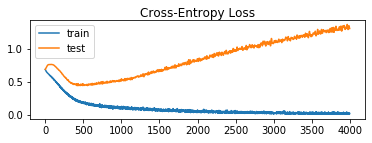

In [12]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

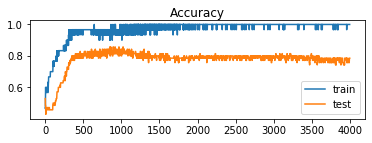

In [13]:
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()